In [ ]:
import pandas as pd
import numpy as np


In [ ]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [ ]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [ ]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
beml_df.set_index(pd.DatetimeIndex(beml_df.Date))

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [ ]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


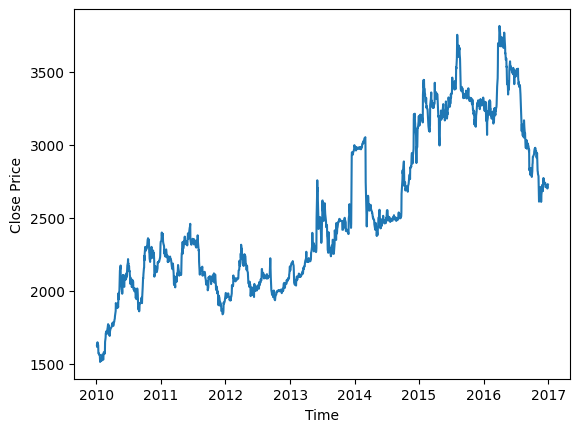

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

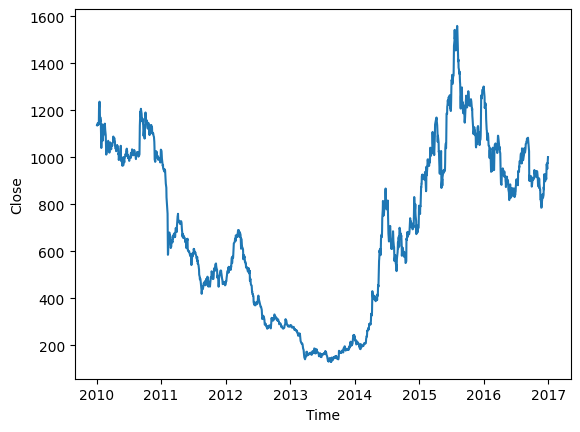

In [ ]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [ ]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [ ]:
glaxo_df.dropna()
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [ ]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Text(0.5, 1.0, 'Beml')

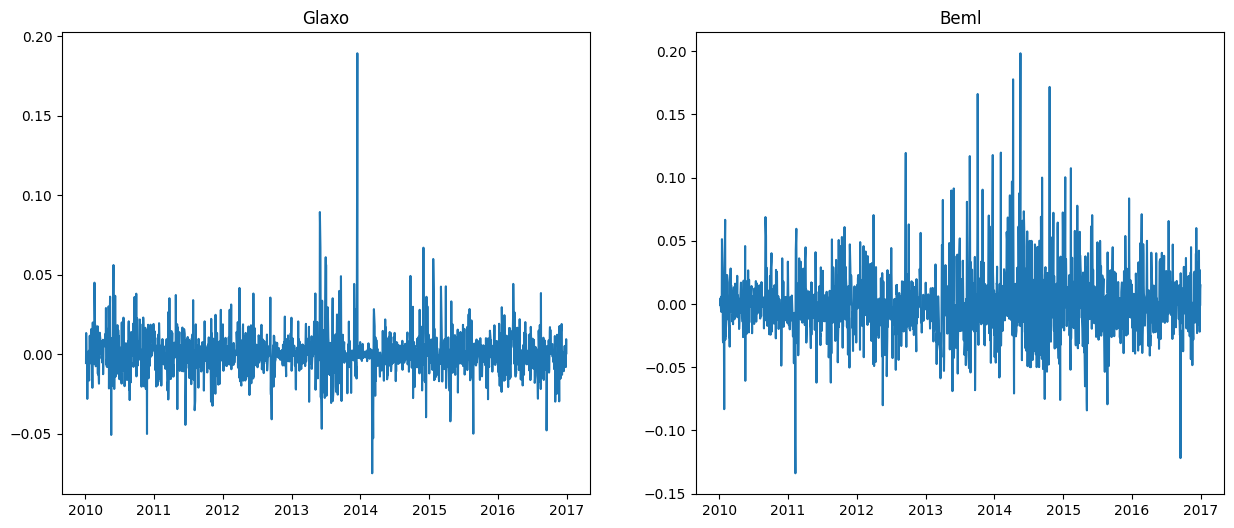

In [ ]:
plt.figure(figsize = (15, 6));
plt.subplot(1,2,1)
plt.plot(glaxo_df.gain)
plt.title('Glaxo')

plt.subplot(1,2,2)
plt.plot(beml_df.gain)
plt.title('Beml')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

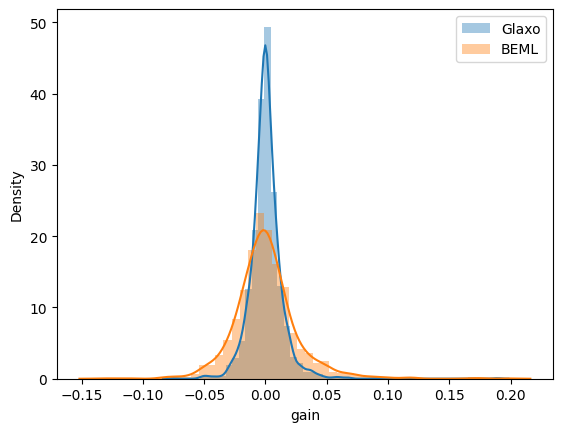

In [ ]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();
plt.show()

In [ ]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [ ]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [ ]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

np.float64(0.06352488667177397)

In [ ]:
#Probability of making 2% gain or higher in Glaxo
from scipy import stats
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

### Inclass Exercise

### Compute 2% loss or gain for BEML

#prob(X<70) using normal distribution where RV follows N(60,10)

from scipy import stats
stats.norm.cdf()

from scipy.stats import norm
norm.cdf()


from scipy.stats.norm import cdf
cdf()

import scipy.stats.norm.cdf as cdf

```
# This is formatted as code
```



In [ ]:
glaxo_df.head()

In [ ]:
beml_df.head()

In [ ]:
glaxo_df.shape

In [ ]:
#if X ~ N(60,10) then find P(X<70)
'''from scipy import stats
or
import scipy.stats as stats'''
from scipy import stats

stats.norm.cdf(x=70,loc=60,scale=10)

In [ ]:
#P(X>70)
1-stats.norm.cdf(x=70,loc=60,scale=10)

In [ ]:
stats.norm.cdf(x=680,loc=711,scale=29)

In [ ]:
stats.norm.cdf(680,711,29)

In [ ]:
#Gmat score data, find P(697<x<740) for mean 711 and sd 29

stats.norm.cdf(740,711,29) - stats.norm.cdf(697,711,29)

In [ ]:
import numpy as np

In [ ]:
np.random.randint(1,1000,100)

In [ ]:
import random


In [ ]:
random.randint(10,100)

In [ ]:
np.random.uniform(0,1,100)

In [ ]:
np.random.binomial(1,0.99,100)

In [ ]:
#generation of 50 normal random numbers with mean 25, Sd 5
np.random.normal(25,5,50)

In [ ]:
import numpy as np

2500/np.sqrt(140)

In [ ]:
from scipy import stats
stats.norm.interval(0.95,loc=1990,scale=(2500/np.sqrt(140)))      #confidence level, point estimator, popn standard deviation(sigma/sqrt(n))

In [ ]:
from scipy import stats
stats.norm.interval(0.9,loc=1990,scale=(2500/np.sqrt(140)))

In [ ]:
###construct 95% confidence interval for mean card balance using t distn

stats.t.interval(0.95,139,1990,(2833/np.sqrt(140)))

In [ ]:
# to find the normal/critical values of t and z we use ppf

In [ ]:
stats.norm.ppf(1-(0.05/2))

In [ ]:
stats.t.ppf((1-(0.05/2)),139)    #point prob function or percent prob function

In [ ]:
import pandas as pd
beml_df=pd.read_csv("BEML.csv")
beml_df.head()

In [ ]:
beml_df=beml_df.iloc[:,[0,5]]

In [ ]:
glaxo_df=pd.read_csv("GLAXO.csv")
glaxo_df.head()

In [ ]:
glaxo_df=glaxo_df.iloc[:,[0,5]]

In [ ]:
beml_df["gain"]=beml_df.Close.pct_change(periods=1)
beml_df.head()

In [ ]:
glaxo_df["gain"]=glaxo_df.Close.pct_change(periods=1)
glaxo_df.head()

In [ ]:
beml_df=beml_df.dropna()
glax_df=glaxo_df.dropna()

In [ ]:
len(beml_df)

In [ ]:
#from scipy import stats
#import scipy.stats as stats
#stats.norm.cdf()

#from scipy.stats import norm
#import scipy.stats.norm as norm
#norm.cdf()

In [ ]:
#To find P(X<70) given X~N(60,10)
from scipy import stats

stats.norm.cdf(x=70,loc=60,scale=10)

np.float64(0.8413447460685429)

In [ ]:
#P(X>70)
1-stats.norm.cdf(x=70,loc=60,scale=10)

np.float64(0.15865525393145707)

In [ ]:
stats.norm.cdf(x=680,loc=711,scale=29)

np.float64(0.14254260383881612)

In [ ]:
stats.norm.cdf(x=740,loc=711,scale=29)-stats.norm.cdf(x=697,loc=711,scale=29)

np.float64(0.5267111786415019)

In [ ]:
from scipy.stats import binom
binom.pmf(2,2,0.5)  #tossing of a coin twice and finding the probability of having 2 heads

np.float64(0.25)

In [ ]:
import numpy as np
#gen discrete uniform
np.random.randint(1,100,1000)  #start,end,num_samples

array([23, 65, 99, 55, 73, 94, 66, 58, 37, 41, 78, 87, 11, 41, 17, 63,  1,
        8, 15, 53,  9,  5, 97, 25, 34, 67, 13, 95, 62, 10, 12, 16, 74, 23,
       84, 46, 21, 27, 63, 31, 93, 17, 21, 99, 82, 96, 53, 33, 88, 69, 60,
       93, 31, 94, 76, 97, 11, 69, 76,  8, 85, 19, 86, 67, 67, 29, 73, 44,
       61, 38,  3, 65, 58, 70, 94, 21, 21, 93, 41, 46, 22, 54, 94, 17,  6,
       13, 65, 92, 54, 29, 51, 80, 18, 78, 13, 21, 57, 54, 27,  1, 15,  9,
       15, 77,  1, 72, 66, 36, 11, 70, 77, 91, 21, 63, 14, 32, 48, 35, 39,
       61, 85, 58,  8, 24, 35, 48, 13, 59, 85, 62, 89, 74, 26, 13, 17, 59,
       18, 20, 13, 84,  5, 33, 59, 99,  7, 87, 39,  5, 57, 28, 57, 78, 36,
       89, 51, 73, 55, 97, 33, 95, 11, 64, 21, 10, 63, 91,  9,  1, 18, 89,
       38, 86, 48, 82, 48, 64, 55, 36, 45, 75, 75, 39, 40, 26, 81, 79, 31,
       24, 16,  6, 36,  7,  4, 17, 71, 64, 96, 83, 25, 46, 34, 49, 59, 52,
       82, 46, 29, 31, 25, 95, 56, 34, 67, 89, 16, 75, 65, 19,  8, 98, 32,
       58, 91, 33, 88, 18

In [ ]:
#continuous uniform(Rectangular)
np.random.uniform(0,1,100) #low,high,size

array([0.44914702, 0.14596905, 0.20780257, 0.11018241, 0.85083534,
       0.95510133, 0.93264486, 0.91666922, 0.65675366, 0.02509806,
       0.45119695, 0.83126012, 0.83447284, 0.61539664, 0.93835318,
       0.20223114, 0.97403695, 0.10130795, 0.57446166, 0.05484751,
       0.72357622, 0.60193178, 0.43529421, 0.31521097, 0.93279276,
       0.89784028, 0.70490618, 0.7647336 , 0.63108762, 0.99129047,
       0.50892151, 0.02471438, 0.04144626, 0.43430998, 0.74929221,
       0.03631397, 0.32316737, 0.40537418, 0.17032164, 0.00411786,
       0.86055064, 0.53535252, 0.41686477, 0.84919931, 0.00237428,
       0.57763716, 0.06859837, 0.00848004, 0.20001976, 0.67083866,
       0.61129273, 0.152192  , 0.60969261, 0.79109462, 0.32100747,
       0.72110333, 0.1995784 , 0.41318515, 0.80318189, 0.32366432,
       0.93921994, 0.75508272, 0.93476285, 0.1393523 , 0.6364005 ,
       0.49468015, 0.2207843 , 0.43072965, 0.03480253, 0.35084011,
       0.66543702, 0.46071108, 0.50842021, 0.09312325, 0.84000

In [ ]:
#binomial random numbers
np.random.binomial(1,0.58,50) #(success_representation,prob(success),num_samples)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1])

In [ ]:
np.random.normal(10,78,25)  #(mean,std,num_samples)

array([  17.07629362,   14.71491907, -126.57255528,  -39.46943012,
        -91.58769779,  -57.92024809,  -38.81090761, -101.1045672 ,
         -4.18944947,   39.0281956 ,   -8.67815518,    4.78123316,
         47.14890356,   -2.59015935,   24.65916983,   91.64935018,
        -52.39675935,  105.55455793,   69.57190561,   23.39994036,
         -7.80537018,   31.53382413,   47.77358033,  -33.41738591,
        -36.39944753])

In [ ]:
import pandas as pd
import numpy as np
pd.DataFrame({
    "Uniform":np.random.uniform(10,50,10),
    "Binomial":np.random.binomial(5,0.5,10),
    "Normal":np.random.normal(25,7,10)
})

,Uniform,Binomial,Normal
0,46.502996,4,22.135117
1,27.399775,1,16.976783
2,37.502038,2,15.200228
3,46.926012,0,18.880222
4,17.747470,3,26.285918
5,47.346551,2,23.570007
6,28.899090,2,23.954179
7,12.121795,5,34.687858
8,19.527623,2,32.528413
9,31.194312,2,16.601681


In [ ]:
glaxo_df.shape

(1738, 3)

In [ ]:
import scipy.stats as stats
stats.t.interval(0.95,1737,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std()/np.sqrt(1738))

(np.float64(-0.00024252348138881485), np.float64(0.0010146056465733981))

In [ ]:
import scipy.stats

or from scipy import stats

In [ ]:
#from scipy import stats.norm.cdf as cdf
#cdf(x,loc=(mean),scale=(std))

In [ ]:
from scipy import stats
stats.norm.cdf(70,loc=60,scale=10)

np.float64(0.8413447460685429)

In [ ]:
from scipy import stats